## Radiomics exploration -- Biomarkers

In [1]:
import sys
import os
from skimage.io import imread
import matplotlib.pyplot as plt
import torchvision
from PIL import Image
import numpy as np
import SimpleITK as sitk
import radiomics as rad
import six
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%load_ext autoreload
%autoreload 2

plt.rcParams.update({"axes.facecolor" : "white",
                     "axes.edgecolor":  "black",
                     "patch.facecolor": "white",
                     "figure.facecolor" : "white"}) # prevent the transparency WHEREEVER IT CAME FROM?!

In [3]:
sys.path.append(os.path.abspath('src/'))
from data.lungdataset import LungData
#from utils import extract_firstlevel_features

rootdir = "/Volumes/Samsung_T5/MA/manifest-1641816674790/subsample_thresh1_A"
ld = LungData(rootdir)
medical_df = ld.raw_ehd
image_df = ld.as_dataframe()
#ld.as_dataframe()

print(medical_df.shape, " -- ", image_df.shape)

(1279, 130)  --  (4728, 8)


In [4]:
rdf = pd.read_csv("data/radiomics/thresh1_radiomics_all_stacked.csv")
rdf = ld.prepare_multiclass_for_radiomics(rdf, medical_df, verbose=False)
rdf.head(5)

,10Percentile_l,90Percentile_l,Energy_l,Entropy_l,InterquartileRange_l,Kurtosis_l,Maximum_l,MeanAbsoluteDeviation_l,Mean_l,Median_l,...,HighGrayLevelEmphasis_r,LargeDependenceEmphasis_r,LargeDependenceHighGrayLevelEmphasis_r,LargeDependenceLowGrayLevelEmphasis_r,LowGrayLevelEmphasis_r,SmallDependenceEmphasis_r,SmallDependenceHighGrayLevelEmphasis_r,SmallDependenceLowGrayLevelEmphasis_r,id,y
0,71.0,150.0,394369086.0,2.394008,41.0,3.095117,218.0,24.855771,113.581023,116.0,...,20.869773,41.678136,840.518399,4.847234,0.110090,0.056541,1.328324,0.005729,A860070,3
1,55.0,149.0,296824858.0,2.539965,50.0,2.468845,194.0,28.485066,104.368473,107.0,...,22.867574,42.255443,937.161292,3.852431,0.087336,0.059224,1.406542,0.005033,A860070,3
2,54.0,161.0,707815625.0,2.702847,57.0,2.444984,211.0,32.624710,111.785194,116.0,...,2.507463,38.208955,86.283582,26.256633,0.639718,0.057139,0.151222,0.037764,A860070,3
3,64.0,155.0,426125614.0,2.510545,48.0,2.926102,215.0,28.382876,115.519975,122.0,...,24.524862,37.920871,942.892160,3.744262,0.094085,0.058552,1.440691,0.005426,A860070,3
4,77.0,171.0,480829393.0,2.587292,51.0,3.016582,224.0,30.056974,129.213178,136.0,...,32.925355,39.206941,1364.961341,2.504407,0.067633,0.058938,1.848536,0.004401,A860070,3


In [5]:
scaler = StandardScaler()
rdfs = scaler.fit_transform(rdf.drop(["id", "y", "xray_path"], axis=1))

rdfs = pd.DataFrame(rdfs, columns = rdf.drop(["id", "y", "xray_path"], axis=1).columns)
#rdfs["left"] = rdf["left"].astype(int)
print(rdfs.shape)
rdfs.head(5)

(4728, 204)


,10Percentile_l,90Percentile_l,Energy_l,Entropy_l,InterquartileRange_l,Kurtosis_l,Maximum_l,MeanAbsoluteDeviation_l,Mean_l,Median_l,...,GrayLevelNonUniformity.2_r,GrayLevelVariance.2_r,HighGrayLevelEmphasis_r,LargeDependenceEmphasis_r,LargeDependenceHighGrayLevelEmphasis_r,LargeDependenceLowGrayLevelEmphasis_r,LowGrayLevelEmphasis_r,SmallDependenceEmphasis_r,SmallDependenceHighGrayLevelEmphasis_r,SmallDependenceLowGrayLevelEmphasis_r
0,1.366156,-0.432888,0.373103,-1.023749,-1.592519,1.713546,0.275278,-1.472579,0.801399,0.829366,...,-0.744035,-0.385462,-0.760326,-0.677136,-0.936106,0.365638,0.471953,0.504692,-0.079741,0.437560
1,0.334936,-0.506453,-0.291590,-0.466352,-0.828620,0.129926,-1.107227,-0.816460,0.110640,0.268347,...,-0.171587,-0.099792,-0.351593,-0.545488,-0.573272,-0.125002,-0.057994,0.807618,0.141933,0.176211
2,0.270485,0.376324,2.509013,0.155678,-0.234477,0.069588,-0.127953,-0.068076,0.666748,0.829366,...,-3.218556,-3.534475,-4.517094,-1.468239,-3.767786,10.924811,12.807181,0.572180,-3.415725,12.458733
3,0.914997,-0.065065,0.589500,-0.578705,-0.998375,1.286165,0.102465,-0.834934,0.946783,1.203379,...,-0.767838,0.238967,-0.012527,-1.533933,-0.551756,-0.178351,0.099194,0.731698,0.238715,0.323788
4,1.752863,1.111971,0.962267,-0.285614,-0.743743,1.514958,0.620904,-0.532283,1.973503,2.076076,...,-0.834801,0.925764,1.706141,-1.240661,1.032850,-0.789851,-0.516898,0.775256,1.394574,-0.060805


[Text(0, 0.5, ''),
 Text(0, 3.5, ''),
 Text(0, 6.5, ''),
 Text(0, 9.5, ''),
 Text(0, 12.5, ''),
 Text(0, 15.5, ''),
 Text(0, 18.5, ''),
 Text(0, 21.5, ''),
 Text(0, 24.5, ''),
 Text(0, 27.5, ''),
 Text(0, 30.5, ''),
 Text(0, 33.5, ''),
 Text(0, 36.5, ''),
 Text(0, 39.5, ''),
 Text(0, 42.5, ''),
 Text(0, 45.5, ''),
 Text(0, 48.5, ''),
 Text(0, 51.5, ''),
 Text(0, 54.5, ''),
 Text(0, 57.5, ''),
 Text(0, 60.5, ''),
 Text(0, 63.5, ''),
 Text(0, 66.5, ''),
 Text(0, 69.5, ''),
 Text(0, 72.5, ''),
 Text(0, 75.5, ''),
 Text(0, 78.5, ''),
 Text(0, 81.5, ''),
 Text(0, 84.5, ''),
 Text(0, 87.5, ''),
 Text(0, 90.5, ''),
 Text(0, 93.5, ''),
 Text(0, 96.5, ''),
 Text(0, 99.5, ''),
 Text(0, 102.5, ''),
 Text(0, 105.5, ''),
 Text(0, 108.5, ''),
 Text(0, 111.5, ''),
 Text(0, 114.5, ''),
 Text(0, 117.5, ''),
 Text(0, 120.5, ''),
 Text(0, 123.5, ''),
 Text(0, 126.5, ''),
 Text(0, 129.5, ''),
 Text(0, 132.5, ''),
 Text(0, 135.5, ''),
 Text(0, 138.5, ''),
 Text(0, 141.5, ''),
 Text(0, 144.5, ''),
 Text(0, 

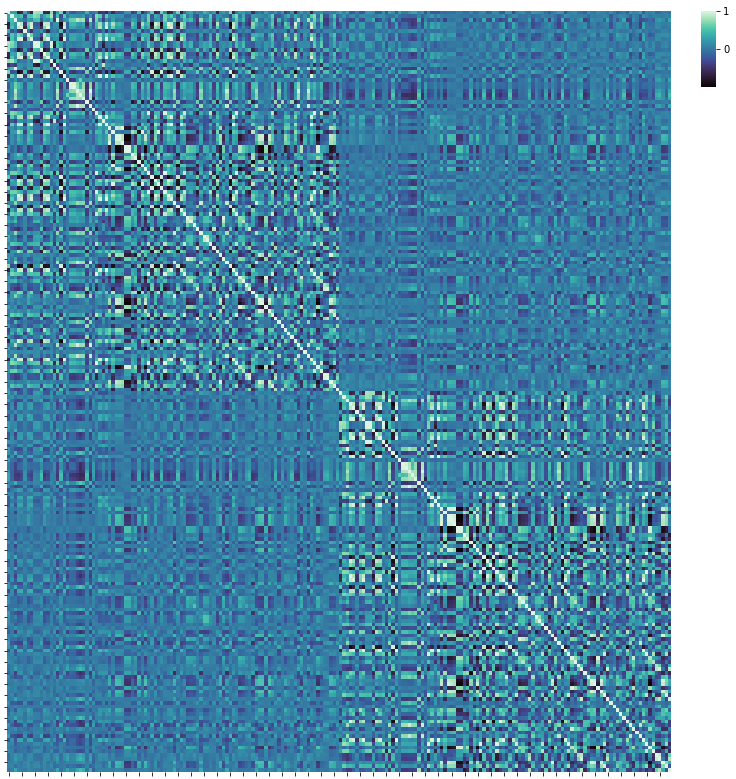

In [6]:
fig, ax = plt.subplots(1,1, figsize=(14,14))
sns.heatmap(rdfs.corr(), 
    cmap="mako",
    #linewidths=0.01,
    cbar=True,
    cbar_kws={#"orientation": "horizontal", 
        "location": "right",
        "fraction": 0.1, "aspect":5, "shrink":0.1,
        "anchor": (-0.15,1)},
    ax=ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
#ax.set_xticks(range(0, rdfs.shape[0]))


In [7]:
rdfs.columns

Index(['10Percentile_l', '90Percentile_l', 'Energy_l', 'Entropy_l',
       'InterquartileRange_l', 'Kurtosis_l', 'Maximum_l',
       'MeanAbsoluteDeviation_l', 'Mean_l', 'Median_l',
       ...
       'GrayLevelNonUniformity.2_r', 'GrayLevelVariance.2_r',
       'HighGrayLevelEmphasis_r', 'LargeDependenceEmphasis_r',
       'LargeDependenceHighGrayLevelEmphasis_r',
       'LargeDependenceLowGrayLevelEmphasis_r', 'LowGrayLevelEmphasis_r',
       'SmallDependenceEmphasis_r', 'SmallDependenceHighGrayLevelEmphasis_r',
       'SmallDependenceLowGrayLevelEmphasis_r'],
      dtype='object', length=204)

In [8]:
featureclasses = {"first_order" : 18, # != 19 std is not enabled by default as it correlates with variance
"shape_based_2d" :  9, # != 10 Spherical Disproportion is not enabled by default as it is correlated to Sphericity
"glcm" : 24,
"glrlm" : 16,
"glszm" : 16,
"ngtdm" : 5,
"gldm" : 14,
}

colors = dict(zip(featureclasses.keys(),
        ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d']) # Dark2
        )

_cmap = []
for k,v in featureclasses.items():
    for i in range(v):
        _cmap.append(colors[k])

print(sum(featureclasses.values()), len(_cmap), rdfs.shape)

rdfs.corr()

102 102 (4728, 204)


,10Percentile_l,90Percentile_l,Energy_l,Entropy_l,InterquartileRange_l,Kurtosis_l,Maximum_l,MeanAbsoluteDeviation_l,Mean_l,Median_l,...,GrayLevelNonUniformity.2_r,GrayLevelVariance.2_r,HighGrayLevelEmphasis_r,LargeDependenceEmphasis_r,LargeDependenceHighGrayLevelEmphasis_r,LargeDependenceLowGrayLevelEmphasis_r,LowGrayLevelEmphasis_r,SmallDependenceEmphasis_r,SmallDependenceHighGrayLevelEmphasis_r,SmallDependenceLowGrayLevelEmphasis_r
10Percentile_l,1.000000,0.288099,0.233346,-0.702569,-0.619825,0.324808,-0.250066,-0.655601,0.820726,0.777739,...,0.253365,-0.232314,0.081770,0.033339,0.107885,-0.105403,-0.087790,0.039288,0.046737,-0.025685
90Percentile_l,0.288099,1.000000,0.475261,0.406784,0.507526,-0.286810,0.534273,0.520756,0.728243,0.659499,...,-0.225765,0.178943,0.083828,-0.010637,0.061710,0.048659,0.047143,0.027377,0.084652,0.039168
Energy_l,0.233346,0.475261,1.000000,0.197204,0.140965,-0.062351,0.254974,0.161030,0.480733,0.498341,...,-0.295448,-0.256051,-0.186636,-0.055082,-0.174254,0.179216,0.237618,0.132179,-0.080025,0.300755
Entropy_l,-0.702569,0.406784,0.197204,1.000000,0.869480,-0.464575,0.668069,0.929656,-0.238769,-0.238128,...,-0.424318,0.282139,-0.025640,-0.081050,-0.079254,0.108090,0.103729,0.018552,0.027769,0.061951
InterquartileRange_l,-0.619825,0.507526,0.140965,0.869480,1.000000,-0.628442,0.541432,0.977159,-0.132979,-0.145039,...,-0.380065,0.314063,-0.013618,-0.005402,-0.035944,0.127872,0.106756,-0.036581,-0.001381,0.045667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LargeDependenceLowGrayLevelEmphasis_r,-0.105403,0.048659,0.179216,0.108090,0.127872,-0.040365,0.103198,0.133104,-0.066339,-0.083248,...,-0.346100,-0.038161,-0.626454,0.162806,-0.514268,1.000000,0.927429,-0.135450,-0.484748,0.620973
LowGrayLevelEmphasis_r,-0.087790,0.047143,0.237618,0.103729,0.106756,-0.029248,0.117178,0.115037,-0.048530,-0.060909,...,-0.400200,-0.065553,-0.637123,-0.050771,-0.576700,0.927429,1.000000,0.040614,-0.414595,0.830161
SmallDependenceEmphasis_r,0.039288,0.027377,0.132179,0.018552,-0.036581,0.070147,0.154337,-0.018074,0.065814,0.079868,...,-0.206396,0.117551,0.092672,-0.875234,-0.289014,-0.135450,0.040614,1.000000,0.701238,0.357493
SmallDependenceHighGrayLevelEmphasis_r,0.046737,0.084652,-0.080025,0.027769,-0.001381,0.067845,0.147863,0.019359,0.105131,0.117394,...,-0.007533,0.432702,0.723579,-0.621316,0.354590,-0.484748,-0.414595,0.701238,1.000000,-0.221600


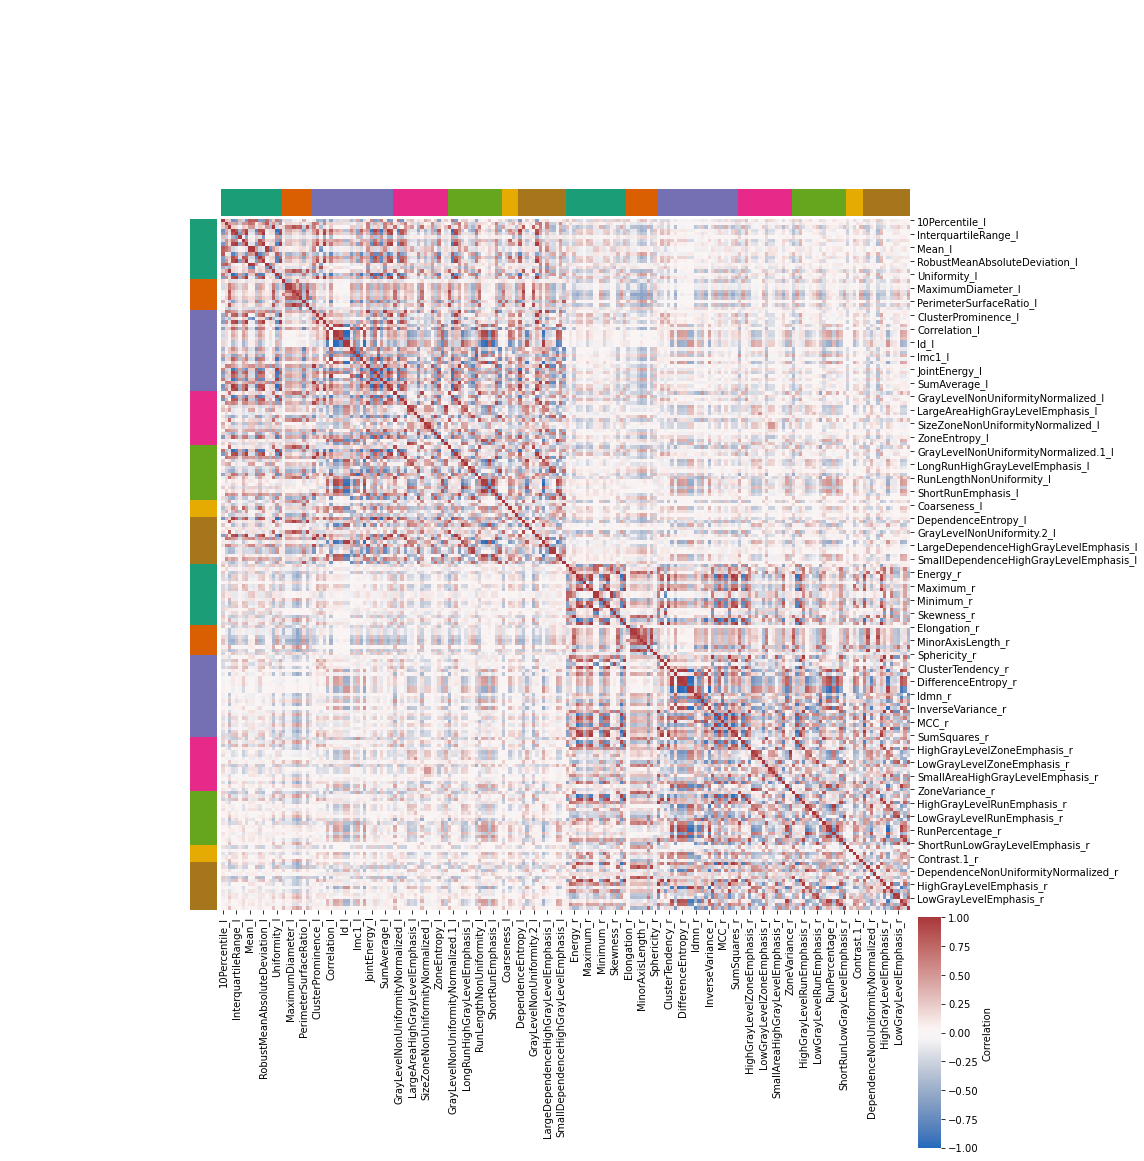

In [20]:
from matplotlib.pyplot import xticks


g = sns.clustermap(rdfs.corr()[rdfs.columns], 
            row_colors=(2*_cmap), col_colors=(2*_cmap),
            row_cluster=False, col_cluster=False,
            cmap="vlag", cbar_pos=(0.8, 0.00, .02, .2),
            cbar_kws={'label': 'Correlation'},
            vmin=-1, vmax=1,
            figsize=(16,16)
        )
#g.savefig("../thesis/figures/results/radiomics/radiomics_clustermap_raw.png", dpi=180)

In [24]:
corr_thresh = 0.95
corr_matrix = rdfs.corr().abs() # Create correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # Select upper triangle of correlation matrix
to_drop = [column for column in upper.columns if any(upper[column] > corr_thresh)] # Find features with correlation greater than 0.95
rdfs_cleaned = rdfs.drop(to_drop, axis=1) # Drop features 
print(to_drop)
print(rdfs_cleaned.shape)


['MeanAbsoluteDeviation_l', 'Median_l', 'RobustMeanAbsoluteDeviation_l', 'RootMeanSquared_l', 'TotalEnergy_l', 'Uniformity_l', 'Variance_l', 'MaximumDiameter_l', 'PixelSurface_l', 'ClusterProminence_l', 'ClusterTendency_l', 'DifferenceEntropy_l', 'DifferenceVariance_l', 'Id_l', 'Idm_l', 'Imc2_l', 'InverseVariance_l', 'JointAverage_l', 'JointEnergy_l', 'MCC_l', 'MaximumProbability_l', 'SumAverage_l', 'SumEntropy_l', 'SumSquares_l', 'ZoneVariance_l', 'GrayLevelNonUniformityNormalized.1_l', 'GrayLevelVariance.1_l', 'HighGrayLevelRunEmphasis_l', 'RunPercentage_l', 'RunVariance_l', 'ShortRunEmphasis_l', 'DependenceEntropy_l', 'DependenceNonUniformity_l', 'GrayLevelVariance.2_l', 'HighGrayLevelEmphasis_l', 'LargeDependenceEmphasis_l', 'LowGrayLevelEmphasis_l', 'SmallDependenceEmphasis_l', 'MeanAbsoluteDeviation_r', 'Median_r', 'RobustMeanAbsoluteDeviation_r', 'RootMeanSquared_r', 'TotalEnergy_r', 'Variance_r', 'MaximumDiameter_r', 'PixelSurface_r', 'ClusterProminence_r', 'ClusterTendency_r',

In [ ]:
#rdfs_cleaned.to_csv("data/radiomics_cleaned.csv", index=False)

In [25]:
rdfs_cleaned["to_patient_id"] = rdf["id"]

rdfs_targets = rdfs_cleaned.merge(medical_df[ld._targets + ["to_patient_id"]], how="outer", on="to_patient_id") # merge with targets
rdfs_targets[ld._targets] = rdfs_targets[ld._targets].replace({"discharged": 0, "deceased": 1,
    True:1, False:0, "Yes":1, "No":0}) # replace targets like done so many times before

ml_df = ld.ml_target_df # get pretty labels
ml_df["to_patient_id"] = medical_df["to_patient_id"] # merge pretty labels with patient ids
rdfs_targets = rdfs_targets.merge(ml_df, how="outer", on="to_patient_id") # merge with target dataframe
_rdfs_targets = rdfs_targets.copy()
rdfs_targets = pd.concat([rdfs_targets, pd.get_dummies(rdfs_targets["Outcome"])], axis=1) # one-hot encode pretty labels
rdfs_targets.drop(["to_patient_id", "labelstring", "y", "Outcome"], axis=1, inplace=True) # drop unnec. cols
print(rdfs_targets.shape)
rdfs_targets.head()


(4728, 142)


,10Percentile_l,90Percentile_l,Energy_l,Entropy_l,InterquartileRange_l,Kurtosis_l,Maximum_l,Mean_l,Minimum_l,Range_l,...,is_icu,was_ventilated,Deceased,Deceased + ICU,Deceased + ICU + Ventilated,Deceased + Ventilated,Hospitalized (only),ICU,ICU + Vent,Ventilated
0,1.366156,-0.432888,0.373103,-1.023749,-1.592519,1.713546,0.275278,0.801399,0.375685,-0.019925,...,1,1,0,0,0,0,0,0,1,0
1,0.334936,-0.506453,-0.291590,-0.466352,-0.828620,0.129926,-1.107227,0.110640,-0.050186,-0.717465,...,1,1,0,0,0,0,0,0,1,0
2,0.270485,0.376324,2.509013,0.155678,-0.234477,0.069588,-0.127953,0.666748,-0.405080,0.135084,...,1,1,0,0,0,0,0,0,1,0
3,0.914997,-0.065065,0.589500,-0.578705,-0.998375,1.286165,0.102465,0.946783,-0.263122,0.212588,...,1,1,0,0,0,0,0,0,1,0
4,1.752863,1.111971,0.962267,-0.285614,-0.743743,1.514958,0.620904,1.973503,-0.121165,0.483854,...,1,1,0,0,0,0,0,0,1,0


In [ ]:
#rdfs_targets.to_csv("data/radiomics_cleaned_targets.csv", index=False)

In [ ]:
# counts = dict(_rdfs_targets["Outcome"].value_counts()[ld.ml_ordering]).values()
# cnames = [f"{_out} (N={n})" for _out, n in zip(plot_df.columns, counts)]

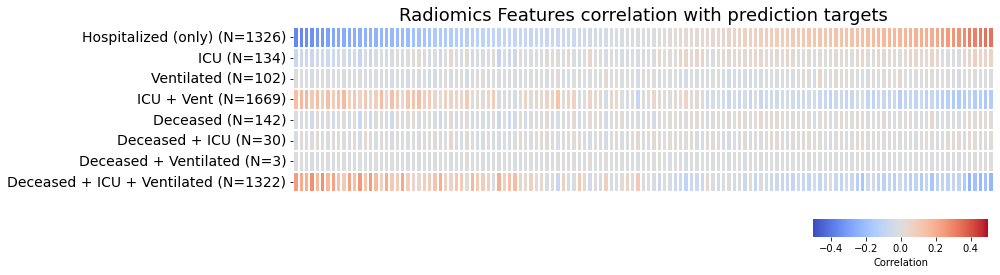

In [30]:
#sns.set_theme(style="whitegrid", font_scale=1.2)
#targets = ld._targets + list(rdfs_targets.columns[-8:])
targets = ld.ml_target_df["Outcome"].unique()
_drops = ld._targets + list(ld.ml_target_df["Outcome"].unique())

plot_df = rdfs_targets.corr()[targets].sort_values(by="Hospitalized (only)").drop(_drops)[ld.ml_ordering]
counts = dict(_rdfs_targets["Outcome"].value_counts()[ld.ml_ordering]).values()
cnames = [f"{_out} (N={n})" for _out, n in zip(plot_df.columns, counts)]
plot_df.columns = cnames

plt.figure(figsize=(14,4))
sns.heatmap(plot_df.T,
    #square=True,
    vmax=0.5, vmin=-0.5,
    #annot=True,
    #fmt=".1f",
    linewidths=0.01, 
    cmap="coolwarm",
    cbar=True,
    cbar_kws={"label":"Correlation", "orientation": "horizontal", "location": "bottom",
        "fraction": 0.1, "aspect":10, "shrink":0.25,
        "anchor": (0.99, 2.35)},
)

plt.title("Radiomics Features correlation with prediction targets", size=18)
plt.yticks(size=14)
plt.xticks([], size=12)
plt.tight_layout()

plt.savefig("../thesis/figures/results/radiomics/radiomics_features_corr_by_target.png", dpi=180)


[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, ''),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, ''),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, ''),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, ''),
 Text(49, 0, ''),
 Text(50, 0, ''),
 Text(51, 0, ''),
 Text(52, 0, ''),
 Text(53, 0, ''),
 Text(54, 0, ''),
 Text(55, 0, ''),
 T

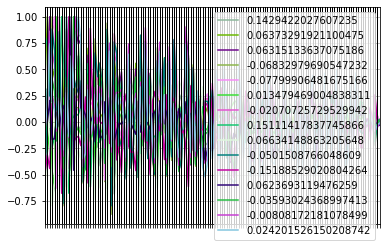

In [36]:
ax = pd.plotting.parallel_coordinates(rdfs_targets.corr()[:15], "ICU + Vent")
ax.set_xticklabels([])

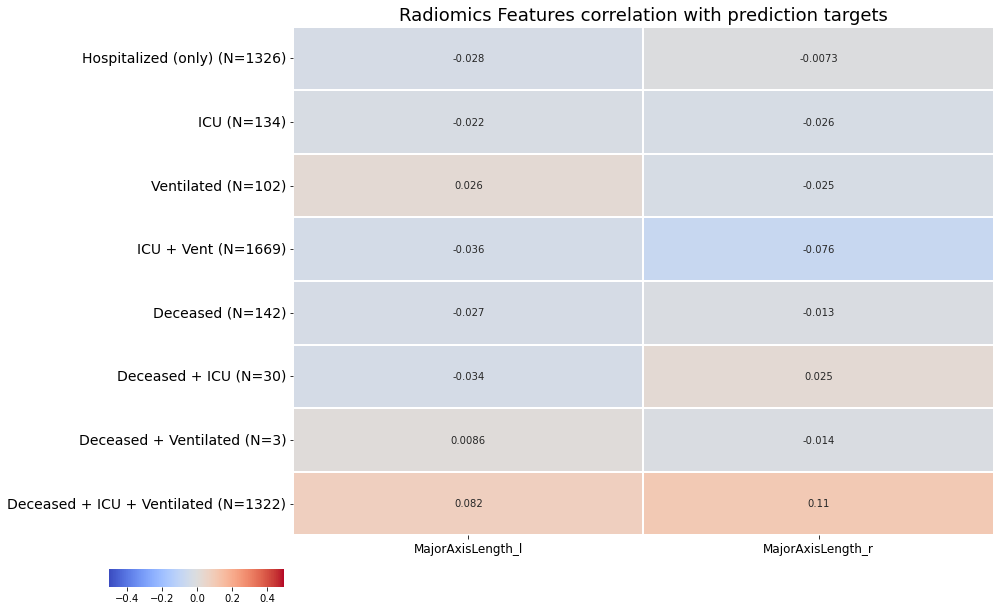

In [13]:
#sns.set_theme(style="whitegrid", font_scale=1.2)
#targets = ld._targets + list(rdfs_targets.columns[-8:])
targets = ld.ml_target_df["Outcome"].unique()
_drops = ld._targets + list(ld.ml_target_df["Outcome"].unique())

plot_df = rdfs_targets.corr()[targets].sort_values(by="Hospitalized (only)").drop(_drops)[ld.ml_ordering]
counts = dict(_rdfs_targets["Outcome"].value_counts()[ld.ml_ordering]).values()
cnames = [f"{_out} (N={n})" for _out, n in zip(plot_df.columns, counts)]
plot_df.columns = cnames

plt.figure(figsize=(14,10))
sns.heatmap(plot_df.T.filter(regex="MajorAxisLength"),
    #square=True,
    vmax=0.5, vmin=-0.5,
    annot=True,
    #fmt=".1f",
    linewidths=0.01, 
    cmap="coolwarm",
    cbar=True,
    cbar_kws={"orientation": "horizontal", "location": "bottom",
        "fraction": 0.1, "aspect":10, "shrink":0.25,
        "anchor": (-0.35, 2.35)},
)

plt.title("Radiomics Features correlation with prediction targets", size=18)
plt.yticks(size=14)
plt.xticks(size=12)
plt.tight_layout()

#plt.savefig("../thesis/figures/results/radiomics/radiomics_features_corr_by_target.png", dpi=180)


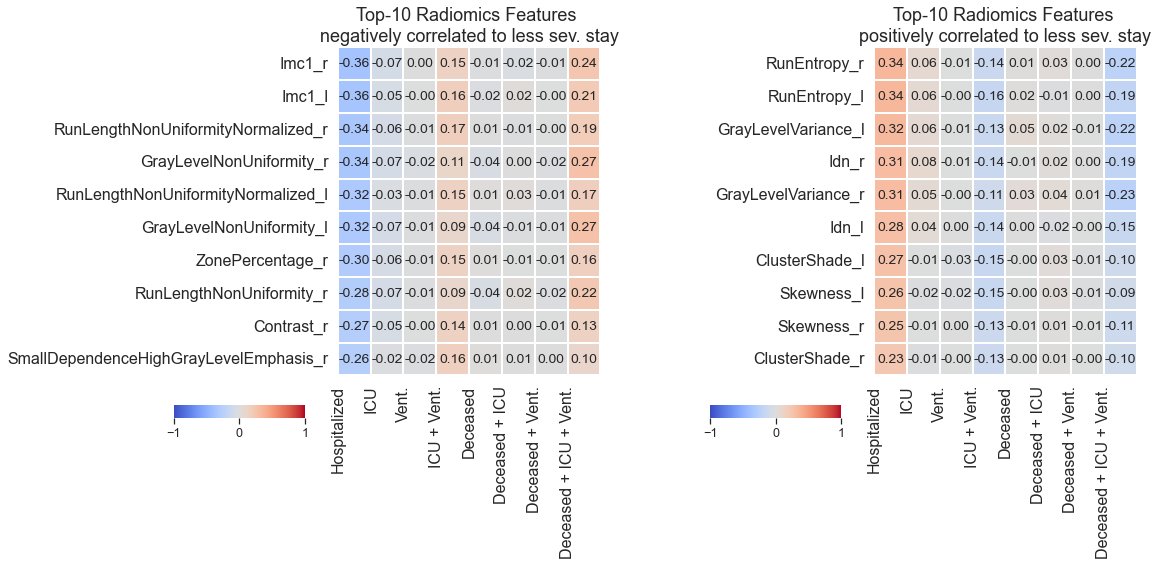

In [207]:
#sns.set_theme(style="whitegrid", font_scale=1.2)
#targets = ld._targets + list(rdfs_targets.columns[-8:])
targets = ld.ml_target_df["Outcome"].unique()
_drops = ld._targets + list(ld.ml_target_df["Outcome"].unique())

fig, ax = plt.subplots(1,2, figsize=(16,12))

i = 0
_top_feats = 10

sns.heatmap(rdfs_targets.corr()[targets].sort_values(by="Hospitalized (only)").drop(_drops)[ld.ml_ordering][:_top_feats],
    square=True,
    vmax=1., vmin=-1.,
    annot=True,
    fmt=".2f",
    linewidths=0.01, 
    cmap="coolwarm",
    cbar=True,
    cbar_kws={"orientation": "horizontal", "location": "bottom",
        "fraction": 0.1, "aspect":10, "shrink":0.5,
        "anchor": (-1.25, 2.35)},
    ax=ax[i]
)

ax[i].set_title(f"Top-{_top_feats} Radiomics Features \nnegatively correlated to less sev. stay", size=18)
ax[i].set_xticks(range(0,8), ld.ml_ordering_short)
ax[i].tick_params(axis='y', labelsize=16)
ax[i].tick_params(axis='x', labelsize=16)

i = 1

sns.heatmap(rdfs_targets.corr()[targets].sort_values(by="Hospitalized (only)", ascending=False).drop(_drops)[ld.ml_ordering][:_top_feats],
    square=True,
    vmax=1., vmin=-1.,
    annot=True,
    fmt=".2f",
    linewidths=0.01, 
    cmap="coolwarm",
    cbar=True,
    cbar_kws={"orientation": "horizontal", "location": "bottom",
        "fraction": 0.1, "aspect":10, "shrink":0.5,
        "anchor": (-1.25, 2.35)},
    ax=ax[i]
)

ax[i].set_title(f"Top-{_top_feats} Radiomics Features \npositively correlated to less sev. stay", size=18)
#yt = ax[i].get_yticks()
#xt = ax[i].get_xticks()
ax[i].set_xticks(range(0,8), ld.ml_ordering_short)
ax[i].tick_params(axis='y', labelsize=16)
ax[i].tick_params(axis='x', labelsize=16)
#ax[i].yaxis.tick_right()
#ax[i].yaxis.set_ticks_position('both')

fig.tight_layout()

fig.savefig("../thesis/figures/results/radiomics/radiomics_top_feats_by_target.png", dpi=180)


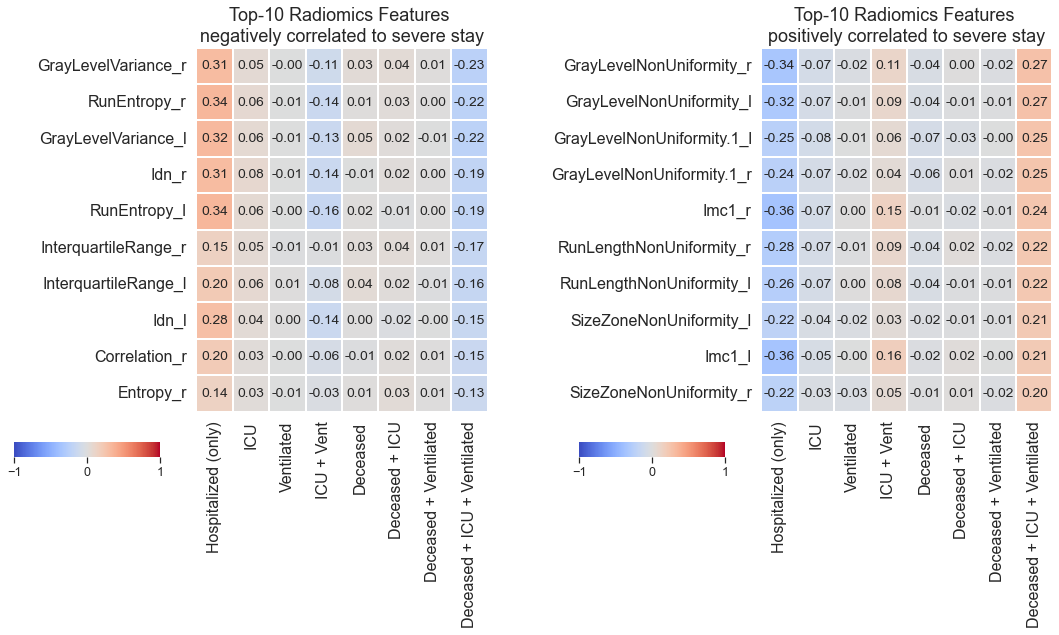

In [196]:
#sns.set_theme(style="whitegrid", font_scale=1.2)
#targets = ld._targets + list(rdfs_targets.columns[-8:])
targets = ld.ml_target_df["Outcome"].unique()
_drops = ld._targets + list(ld.ml_target_df["Outcome"].unique())

fig, ax = plt.subplots(1,2, figsize=(16,12))

i = 0
_top_feats = 10

sns.heatmap(rdfs_targets.corr()[targets].sort_values(by="Deceased + ICU + Ventilated").drop(_drops)[ld.ml_ordering][:_top_feats],
    square=True,
    vmax=1., vmin=-1.,
    annot=True,
    fmt=".2f",
    linewidths=0.01, 
    cmap="coolwarm",
    cbar=True,
    cbar_kws={"orientation": "horizontal", "location": "bottom",
        "fraction": 0.1, "aspect":10, "shrink":0.5,
        "anchor": (-1.25, 2.35)},
    ax=ax[i]
)

ax[i].set_title(f"Top-{_top_feats} Radiomics Features \nnegatively correlated to severe stay", size=18)
ax[i].tick_params(axis='y', labelsize=16)
ax[i].tick_params(axis='x', labelsize=16)

i = 1

sns.heatmap(rdfs_targets.corr()[targets].sort_values(by="Deceased + ICU + Ventilated", ascending=False).drop(_drops)[ld.ml_ordering][:_top_feats],
    square=True,
    vmax=1., vmin=-1.,
    annot=True,
    fmt=".2f",
    linewidths=0.01, 
    cmap="coolwarm",
    cbar=True,
    cbar_kws={"orientation": "horizontal", "location": "bottom",
        "fraction": 0.1, "aspect":10, "shrink":0.5,
        "anchor": (-1.25, 2.35)},
    ax=ax[i]
)

ax[i].set_title(f"Top-{_top_feats} Radiomics Features \npositively correlated to severe stay", size=18)
yt = ax[i].get_yticks()
xt = ax[i].get_xticks()
ax[i].tick_params(axis='y', labelsize=16)
ax[i].tick_params(axis='x', labelsize=16)
#ax[i].yaxis.tick_right()
#ax[i].yaxis.set_ticks_position('both')

fig.tight_layout()

fig.savefig("../thesis/figures/results/radiomics/radiomics_top_feats_by_target_mortal.png", dpi=180)


---
### Some examples

In [15]:
from skimage.io import imread
rdfs[["xray_path", "y"]] = rdf[["xray_path", "y"]]

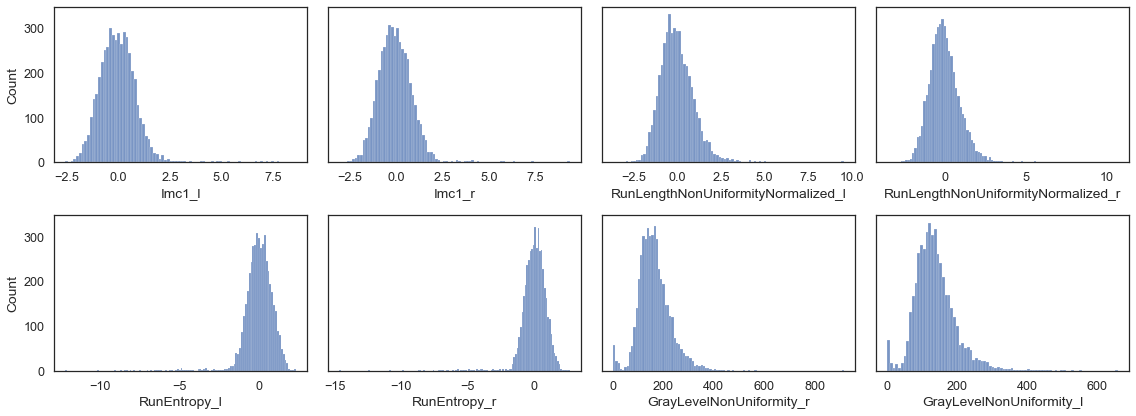

In [187]:
sns.set(style="white", font_scale=1.15)  # crazy big

fig, ax = plt.subplots(2,4, figsize=(16,6), sharey=True)
sns.histplot(rdfs["Imc1_l"], ax=ax[0,0])
sns.histplot(rdfs["Imc1_r"], ax=ax[0,1])
sns.histplot(rdfs["RunLengthNonUniformityNormalized_l"], ax=ax[0,2])
sns.histplot(rdfs["RunLengthNonUniformityNormalized_r"], ax=ax[0,3])

sns.histplot(rdfs["RunEntropy_l"], ax=ax[1,00])
sns.histplot(rdfs["RunEntropy_r"], ax=ax[1,1])
sns.histplot(rdf["GrayLevelNonUniformity_r"], ax=ax[1,2])
sns.histplot(rdf["GrayLevelNonUniformity_l"], ax=ax[1,3])

fig.tight_layout()

#### Imc1_r

Informational Measure of Correlation (IMC) 1 assesses the correlation between the probability distributions of 𝑖 and 𝑗 (quantifying the complexity of the texture), using mutual information I(x, y)

In [2]:
def _load_image(input:str):
    img = imread(input)
    img = Image.fromarray(img).convert("P")
    img = torchvision.transforms.functional.resize(img, (512, 512))
    return img

def _blend(img:str, mask:str, opacity=0.2):
    img = _load_image(img)
    mask = imread(mask, as_gray=True)
    mask_blend = (np.stack(( np.zeros((512,512)), mask, np.zeros((512,512)) ), axis=2) * 255).astype(np.uint8).reshape(512,512,3)
    #blended = Image.blend(img.convert("RGB"), Image.fromarray(mask), 0.2)
    blent = Image.blend(img.convert("RGB"), Image.fromarray(mask_blend), opacity)
    return blent

def plot_rad_examples(blend, MASK, FEAT, opacity=0.075, switch_logic=False, use_scaled=True,
                    filter_outcomes=True, n_images=3, remove_outliers=True, outlier_thresh = 2.5,
                    top3=None, bot3=None, safepath=None):
    if top3 is None and bot3 is None:
        rdfs[["xray_path", "y"]] = rdf[["xray_path", "y"]]
        if use_scaled:
            runent = rdfs.copy()
        else:
            runent = rdf.copy()
        # remove outliers here to not display shitty segmentation
        if remove_outliers:
            runent = runent[np.abs(runent[FEAT]-runent[FEAT].mean())<=(outlier_thresh*runent[FEAT].std())]
        runent = runent.sort_values(by=FEAT, ascending=True).reset_index(drop=True).copy()
        if filter_outcomes:
            if switch_logic == True:
                top3 = runent[runent["y"] != 0][:n_images] 
                bot3 = runent[runent["y"] == 0][-n_images:] 
            elif switch_logic == False:
                top3 = runent[runent["y"] == 0][:n_images] # low values -> bad
                bot3 = runent[runent["y"] != 0][-n_images:] # high values -> good
        else:
            top3 = runent[:n_images] 
            bot3 = runent[-n_images:] 

    fig,ax = plt.subplots(2,n_images,figsize=(12,8), sharey=True)

    #for p in top3.xray_path:
    #    print(p)
    for p in top3.xray_path:
        print(p)

    for nr in range(0,n_images):
        if blend:
            img = _blend(top3.iloc[nr].xray_path, top3.iloc[nr].xray_path[:-4]+MASK, opacity)
        else:
            img = _load_image(top3.iloc[nr].xray_path)
        ax[0, nr].imshow(img, cmap="gray")
        ax[0, nr].set_title(f"{top3.iloc[nr][FEAT]:.3g} - Outcome:\n{ld.ml_ordering_short[top3.iloc[nr]['y']]}", size=16)
        ax[0, nr].set_xticks([])
        ax[0, nr].set_yticks([])
        if nr==0:
            ax[0, nr].set_ylabel(f"Lower Values", size=18)
        
        if blend:
            img = _blend(bot3.iloc[nr].xray_path, bot3.iloc[nr].xray_path[:-4]+MASK, opacity)
        else:
            img = _load_image(bot3.iloc[nr].xray_path)
        ax[1, nr].imshow(img, cmap="gray")
        ax[1, nr].set_title(f"{bot3.iloc[nr][FEAT]:.3g} - Outcome:\n{ld.ml_ordering_short[bot3.iloc[nr]['y']]}", size=16)
        ax[1, nr].set_xticks([])
        ax[1, nr].set_yticks([])
        if nr==0:
            ax[1, nr].set_ylabel(f"Higher Values", size=18)
    fig.suptitle(f"{FEAT}", fontsize=20)

    fig.tight_layout()
    if safepath is not None:
        fig.savefig(safepath)
    #bot3.iloc[0].xray_path
    #img = _load_image(bot3.iloc[0].xray_path)
    #_blend(bot3.iloc[0].xray_path, bot3.iloc[0].xray_path[:-4]+"_mask_cleaned.png")

/Volumes/Samsung_T5/MA/manifest-1641816674790/subsample_thresh1_A/A863973/12-31-1900-NA-CHEST AP VIEWONLY-93611/1.000000-AP-50765/1-1.png
/Volumes/Samsung_T5/MA/manifest-1641816674790/subsample_thresh1_A/A948013/12-31-1900-NA-CHEST AP VIEWONLY-83127/1.000000-AP-37402/1-1.png
/Volumes/Samsung_T5/MA/manifest-1641816674790/subsample_thresh1_A/A806933/01-03-1901-NA-CHEST AP PORT-36564/1.000000-AP-43394/1-1.png


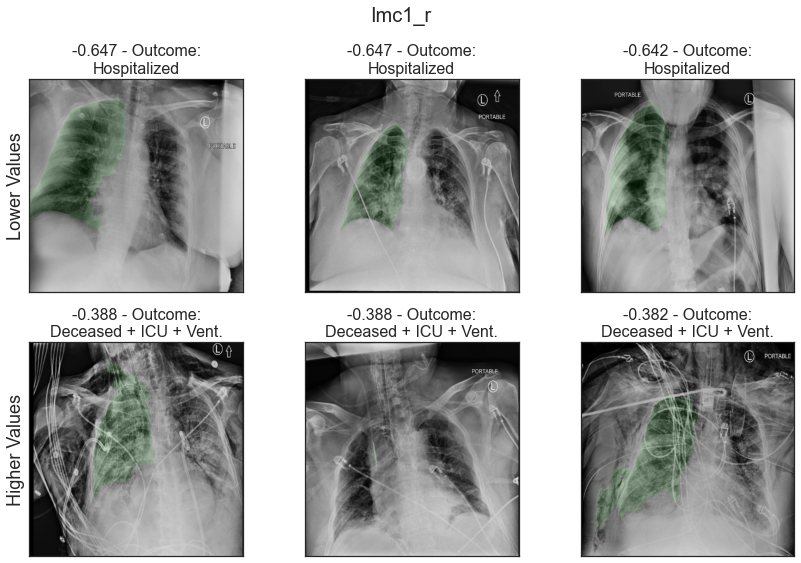

In [184]:
plot_rad_examples(True, "_mask_r.png", "Imc1_r", 0.075, use_scaled=False)

/Volumes/Samsung_T5/MA/manifest-1641816674790/subsample_thresh1_A/A850801/12-28-1900-NA-CHEST AP PORT-31781/1.000000-AP-08167/1-1.png
/Volumes/Samsung_T5/MA/manifest-1641816674790/subsample_thresh1_A/A825484/12-31-1900-NA-CHEST AP VIEWONLY-53003/1.000000-AP-36618/1-1.png
/Volumes/Samsung_T5/MA/manifest-1641816674790/subsample_thresh1_A/A467564/12-31-1900-NA-CHEST AP VIEWONLY-33584/1.000000-AP-27376/1-1.png


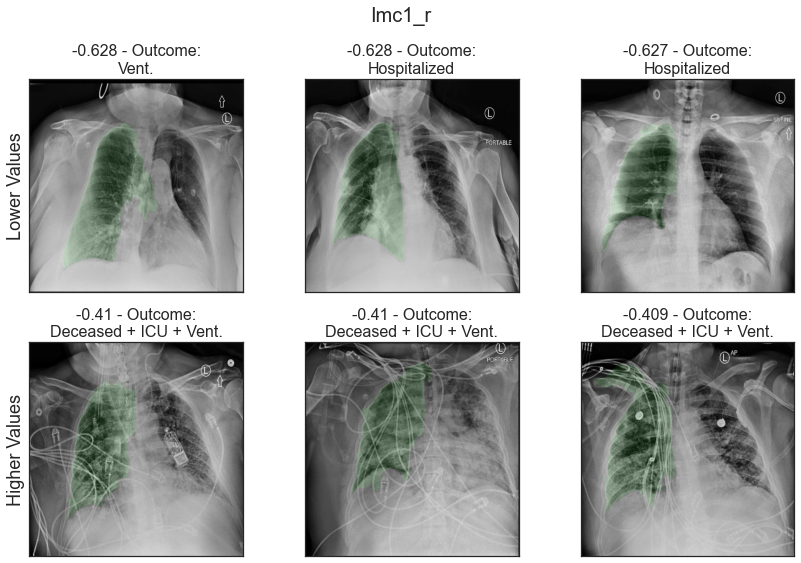

In [198]:
plot_rad_examples(blend=True, MASK="_mask_r.png", FEAT="Imc1_r",
                 use_scaled=False, remove_outliers=True, outlier_thresh=1.98, filter_outcomes=False,
                 safepath="../thesis/figures/results/radiomics/radiomics_imc1_r_examples.png")

We see that this makes sense... clearer pictures have a lower complexity while not so simple ones have higher IMC values. Is this an artifact from the segmentation though?

In [ ]:
# GLN measures the variability of gray-level intensity values in the image, with a lower value indicating more homogeneity in intensity values.

# thats svery nice
# plot_rad_examples(blend=True, MASK="_mask_l.png", FEAT="GrayLevelNonUniformity_l",
#                  opacity=0.05, use_scaled=False, remove_outliers=True, outlier_thresh=1.5,
#                  switch_logic=False, filter_outcomes=True 
#                  )

plot_rad_examples(blend=True, MASK="_mask_l.png", FEAT="GrayLevelNonUniformity_l",
                 opacity=0.075, use_scaled=False, remove_outliers=True, outlier_thresh=1.1,
                 switch_logic=False, filter_outcomes=False,
                 safepath="../thesis/figures/results/radiomics/radiomics_GLN_l_examples.png"
                )

/Volumes/Samsung_T5/MA/manifest-1641816674790/subsample_thresh1_A/A592111/12-31-1900-NA-CHEST AP VIEWONLY-62989/1.000000-AP-04348/1-1.png
/Volumes/Samsung_T5/MA/manifest-1641816674790/subsample_thresh1_A/A288451/12-31-1900-NA-CHEST AP PORT-10146/1.000000-AP-07530/1-1.png
/Volumes/Samsung_T5/MA/manifest-1641816674790/subsample_thresh1_A/A790458/12-31-1900-NA-CHEST AP PORT-19852/1.000000-AP-33703/1-1.png


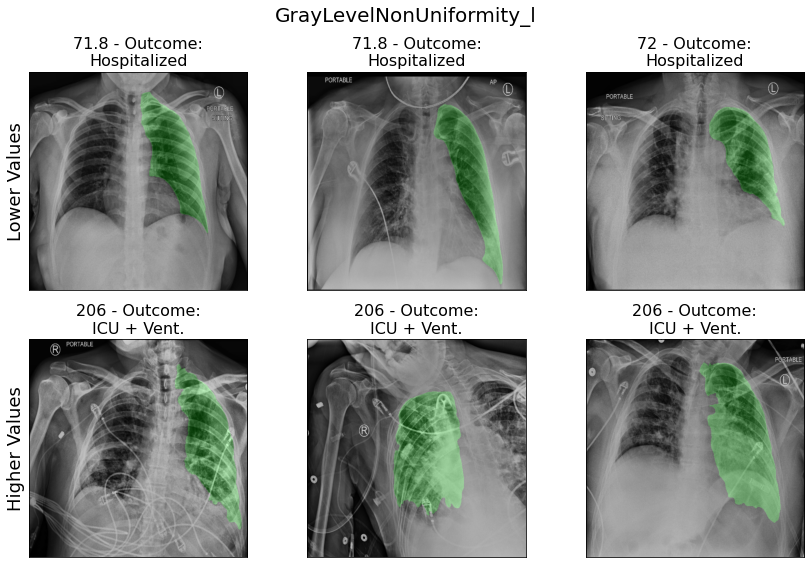

In [8]:
# GLN measures the variability of gray-level intensity values in the image, with a lower value indicating more homogeneity in intensity values.

# thats svery nice
# plot_rad_examples(blend=True, MASK="_mask_l.png", FEAT="GrayLevelNonUniformity_l",
#                  opacity=0.05, use_scaled=False, remove_outliers=True, outlier_thresh=1.5,
#                  switch_logic=False, filter_outcomes=True 
#                  )

plot_rad_examples(blend=True, MASK="_mask_l.png", FEAT="GrayLevelNonUniformity_l",
                 opacity=0.2, use_scaled=False, remove_outliers=True, outlier_thresh=1.1,
                 switch_logic=False, filter_outcomes=False,
                 safepath="../thesis/figures/results/radiomics/radiomics_GLN_l_examples_MOREBLEND.png"
                )

/Volumes/Samsung_T5/MA/manifest-1641816674790/subsample_thresh1_A/A766483/01-03-1901-NA-CHEST AP PORT CENTRAL LINE PL-51182/1.000000-AP-98095/1-1.png
/Volumes/Samsung_T5/MA/manifest-1641816674790/subsample_thresh1_A/A918899/12-31-1900-NA-CHEST AP VIEWONLY-77593/1.000000-AP-95033/1-1.png
/Volumes/Samsung_T5/MA/manifest-1641816674790/subsample_thresh1_A/A352067/12-26-1900-NA-CHEST AP VIEWONLY-59131/1.000000-AP-64454/1-1.png


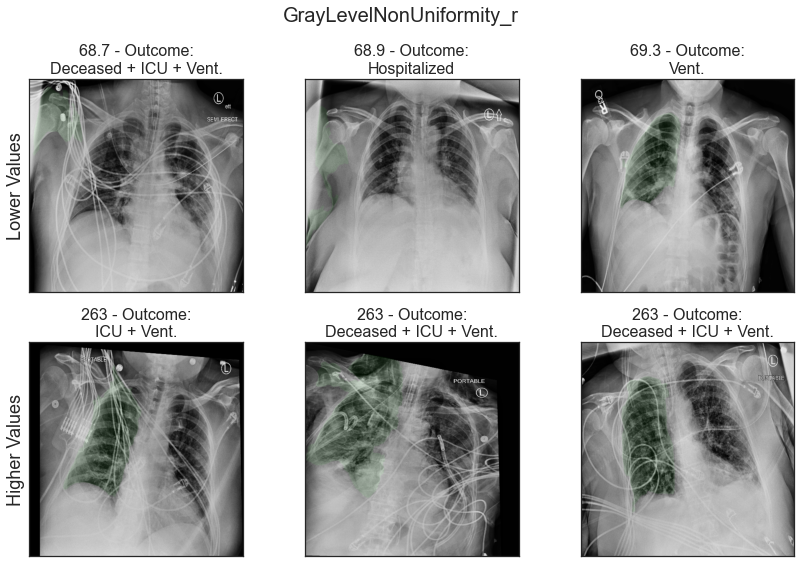

In [192]:
plot_rad_examples(blend=True, MASK="_mask_r.png", FEAT="GrayLevelNonUniformity_r",
                 opacity=0.05, use_scaled=False, switch_logic=False, filter_outcomes=False,
                 remove_outliers=True, outlier_thresh=1.5)